In [2097]:
import math
from abc import ABCMeta, abstractmethod
import numpy as np

PI = math.pi

class Function:
    __metaclass__ = ABCMeta
    
    @abstractmethod
    def eval(self, X): pass
    
    def __init__(self, d):
        self.d = d
    
class DiffFunction:
    __metaclass__ = ABCMeta
    
    @abstractmethod
    def gradient(self, X): pass

class Diff2Function:
    __metaclass__ = ABCMeta
    
    @abstractmethod
    def hessian(self, X): pass
    
    def hessian_det(self, X):
        return np.linalg.det(self.hessian(X))



In [2098]:
class QuadraticFunction(Function, DiffFunction, Diff2Function):
    d = 1
    
    def eval(self, X):
        e = 0
        
        for i in range(self.d):
            e += (X[i]**2)
        
        return e
    
    def feasible(self, X):
        return True
        
    def gradient(self, X):
        grad = np.zeros(self.d)
        
        for i in range(self.d):
            grad[i] = 2 * X[i]
        
        return grad

    def hessian(self, X):
        hess = np.zeros([self.d, self.d])
        
        for i in range(self.d):
            for j in range(self.d):
                if i == j:
                    hess[i][j] = 2
                                                                                  
        return hess

In [2099]:
class RastriginFunction(Function, DiffFunction, Diff2Function):
    d = 1
    
    def eval(self, X):
        e = 10 * self.d
        
        for i in range(self.d):
            e += (X[i]**2) - 10 * math.cos(2 * PI * X[i])
        
        return e
    
    def feasible(self, X):
        for i in range(self.d):
            if X[i] > 5.12 or X[i] < -5.12:
                return False
        return True
        
    def gradient(self, X):
        grad = np.zeros(self.d)
        for i in range(self.d):
            grad[i] = 2 * ( X[i] + 10 * PI * math.sin(2*PI*X[i]) )
        
        return grad

    def hessian(self, X):
        hess = np.zeros([self.d, self.d])
        
        for i in range(self.d):
            for j in range(self.d):
                if i == j:
                    hess[i][j] = 2 * ( 1 + 20 * (PI**2) * math.cos(2*PI*X[i]) )
                                                                                  
        return hess
        
rf = RastriginFunction(2)
rf.eval([0, 0])
                      
grad = rf.gradient([0, 0])
hess = rf.hessian([0, 0])
print(hess)
hess_det = rf.hessian_det([0, 0])
print(hess_det)

[[ 396.78417604    0.        ]
 [   0.          396.78417604]]
157437.682359


In [2100]:
class GriewankFunction(Function, DiffFunction, Diff2Function):
    d = 1
    
    def eval(self, X):
        suma = 0
        prod = 1
        
        for i in range(self.d):
            suma += (X[i]**2) / 4000
            prod *= math.cos(X[i]/math.sqrt(i+1))
            
        return suma - prod + 1
    
    def feasible(self, X):
        for i in range(self.d):
            if X[i] > 600 or X[i] < -600:
                return False
        return True
    
    def gradient(self, X):
        grad = np.zeros(self.d)
        
        for i in range(self.d):
            prod = 1
            for k in range(self.d):
                if k != i:
                    prod *= math.cos(X[i] / math.sqrt(i+1))
                    
            grad[i] = (X[i] / 2000) + math.sin(X[i]/math.sqrt(i+1)) * (1/math.sqrt(i+1)) * prod
        
        return grad

    def hessian(self, X):
        hess = np.zeros([self.d, self.d])
        
        for i in range(self.d):
            for j in range(self.d):
                if i == j:
                    prod = 1
                    
                    for k in range(self.d):
                        if k != i:
                            prod *= math.cos(X[k]/math.sqrt(k+1))
                    
                    hess[i][j] = (1/2000) + math.cos(X[i]) * (1/(i+1)) * prod
                else:
                    prod = 1
                    
                    for k in range(self.d):
                        if k != i and k != j:
                            prod *= math.cos(X[k]/math.sqrt(k+1))
                            
                    hess[i][j] = math.sin(X[i]/math.sqrt(i+1)) * (1/math.sqrt(i+1)) * prod
                    hess[i][j] *= -1 * math.sin(X[j]/math.sqrt(j+1)) * (1/math.sqrt(j+1))
                                                                                  
        return hess
    
gf = GriewankFunction(2)
gf.eval([0, 0])
                      
grad = gf.gradient([0, 0])
hess = gf.hessian([0, 0])
print(hess)
hess_det = gf.hessian_det([0, 0])
print(hess_det)

[[ 1.0005 -0.    ]
 [-0.      0.5005]]
0.50075025


In [2101]:
class SchwefelFunction(Function):
    d = 1
    
    def eval(self, X):
        suma = 0
        
        for i in range(self.d):
            suma += X[i] * math.sin(math.sqrt(math.abs(X[i])))
        
        return 418.9829 * self.d - suma
    
    def feasible(self, X):
        for i in range(self.d):
            if X[i] > 500 or X[i] < -500:
                return False
        return True

In [2102]:
def newton_raphson(f, X, max_iter):
    fitness = np.zeros(max_iter)
    
    for it in range(max_iter):
        grad = f.gradient(X)
        hess_det = f.hessian_det(X)

        Y = np.copy(X)

        for i in range(f.d):
            Y[i] += (-grad[i]) / hess_det

        X = Y
        
        fitness[it] = f.eval(X)
        
    return fitness

In [2103]:
def gradient_descent(f, X, max_iter):
    fitness = np.zeros(max_iter)
    gamma = .3
    
    for it in range(max_iter):
        grad = f.gradient(X)    

        Y = np.copy(X)
        
        for i in range(f.d):
            Y[i] += (-grad[i]) * gamma
        
        X = Y
        
        fitness[it] = f.eval(X)
        
    return fitness

In [2104]:
def gradient_descent_with_momentum(f, X, max_iter):
    fitness = np.zeros(max_iter)
    alpha = .1
    miu = .8
    
    previous_delta = np.zeros(f.d)
    delta = np.copy(previous_delta)
    
    for it in range(max_iter):
        grad = f.gradient(X)

        Y = np.copy(X)

        for i in range(f.d):
            delta[i] = miu * previous_delta[i] - grad[i] * alpha
            Y[i] += delta[i]
            
            previous_delta = delta
            
        X = Y
        
        fitness[it] = f.eval(X)
        
    return fitness

In [2105]:
def rand_normal():    
    return np.random.randn()

def rand_power_law():
    alpha = 2.
    norm_rand = rand_normal()
    dir = np.random.choice([-1,1])
    
    return dir * (1 - norm_rand) ** (1/(1-alpha))

In [2106]:
def hill_climbing(f, X, max_iter, rand_f):
    fitness = np.zeros(max_iter)
    sigma = 5
    
    for it in range(max_iter):
        Y = np.copy(X)

        for i in range(f.d):
            Y[i] += rand_f() * sigma
        
        if f.eval(Y) < f.eval(X):
            X = Y
        
        fitness[it] = f.eval(X)
        
    return fitness

In [2107]:
def simulated_annealing(f, X, max_iter, rand_f):
    fitness = np.zeros(max_iter)
    sigma = 1.5
    t_max = 50
    t = 1
    
    for it in range(max_iter):
        if t == t_max:
            t = 1
    
        T = t/t_max
    
        Y = np.copy(X)
        
        for i in range(f.d):
            Y[i] += rand_f() * sigma
        
        delta_D = f.eval(Y) - f.eval(X)
        
        r = min(1,np.exp(-delta_D*T))
        
        if delta_D < 0 or np.random.randn() < r:
            X = Y
            
        t += 1
        
        if abs(0-f.eval(X)) < 1e-3:
            return it
        
    return max_iter

In [2108]:

max_iter = 1000
epochs = 30
fitness = np.zeros((epochs, max_iter))
performance = np.zeros(epochs)

for e in range(epochs):
    rf = GriewankFunction(2)
    X = np.random.rand(2) * np.random.randint(1000)
    fitness[e] = newton_raphson(rf, X, max_iter)    
    #fitness[e] = gradient_descent(rf, X, max_iter)
    #fitness[e] = gradient_descent_with_momentum(rf, X, max_iter)
    #fitness[e] = hill_climbing(rf, X, max_iter, rand_normal)
    #fitness[e] = hill_climbing(rf, X, max_iter, rand_power_law)
    #print(simulated_annealing(rf, X, max_iter, rand_normal))
    #print(simulated_annealing(rf, X, max_iter, rand_power_law))
    
    performance[e] = np.amin(fitness[e])

worst = np.amax(fitness, axis=0)
best = np.amin(fitness, axis=0)
avg = np.mean(fitness, axis=0)
median = np.median(fitness, axis=0)
std = np.std(fitness, axis=0)

print(fitness)

[[  339.36399427   343.81101318   345.59365386 ...,  3555.13699059
   3516.6562933   3474.68401685]
 [   19.54136039    19.55714386    19.6042646  ...,    21.68086331
     21.68014275    21.68085969]
 [    4.72147241     4.55476092     4.78880658 ...,    40.77508121
     40.77508121    40.77508121]
 ..., 
 [   18.31385341    18.97145192    19.32873713 ...,    18.34677978
     18.34677978    18.34677978]
 [   23.28345777    23.07058901    23.24987508 ...,    49.2211064
     49.22952649    49.22113334]
 [  125.5220539    125.48498428   125.45636199 ...,   121.86867806
    121.77127766   121.77213602]]


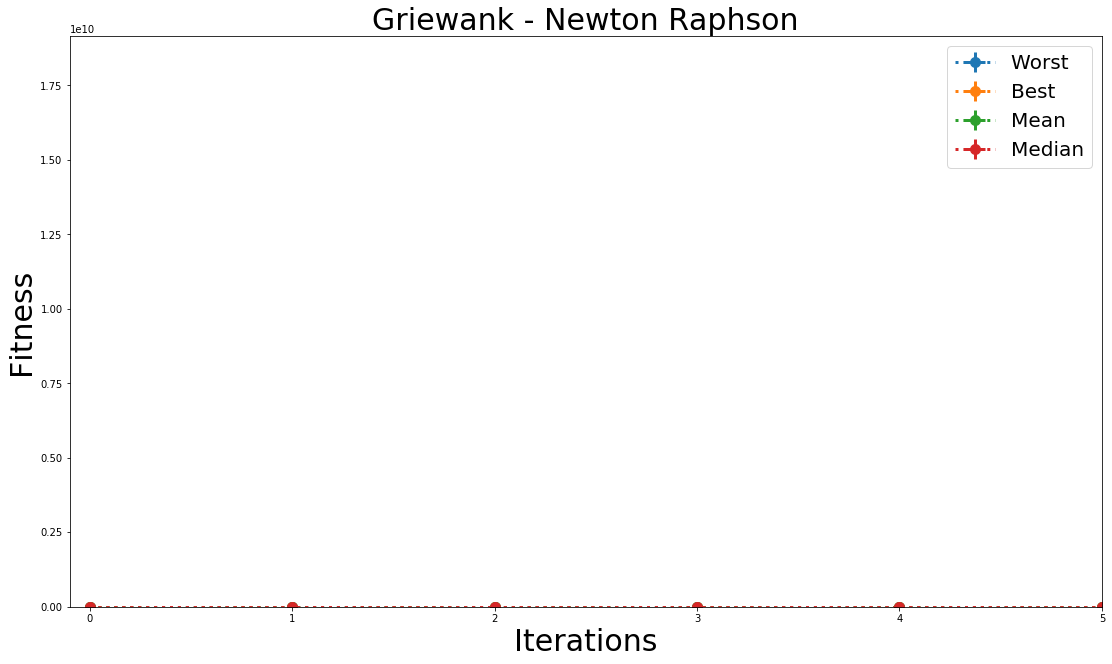

In [2112]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
# example data
x = np.arange(0, max_iter)
y = avg

# example error bar values that vary with x-position

ls = 'dotted'

fig, ax = plt.subplots()
ax.errorbar(x, worst, xerr=0, yerr=std, marker='o', markersize=10, linestyle=ls, label='Worst', linewidth=3)
ax.errorbar(x, best, xerr=0, yerr=std, marker='o', markersize=10, linestyle=ls, label='Best', linewidth=3)
ax.errorbar(x, avg, xerr=0, yerr=std, marker='o', markersize=10, linestyle=ls, label='Mean', linewidth=3)
ax.errorbar(x, median, xerr=0, yerr=std, marker='o', markersize=10, linestyle=ls, label='Median', linewidth=3)
ax.legend(prop={'size': 20})

fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.ylabel('Fitness', fontsize=30)
plt.xlabel('Iterations', fontsize=30)
plt.axis([-0.1, 5, -10, np.amax(worst)+np.amax(std)*1.2])
plt.title('Griewank - Newton Raphson', fontsize=30)
#plt.xticks([1, 2, 3, 4, 5])
plt.show(50)